### Student Information
Name: 鄭宗元

Student ID: 111065428

GitHub ID: yurisoba

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

## Setup

In [238]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

%matplotlib inline

import helpers.data_mining_helpers as dmh

from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

nltk.download("punkt")
nltk.download("stopwords")

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

col = ['coral', 'blue', 'black', 'orange']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to /home/ben/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ben/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Exercise 2

In [9]:
X.query("category_name == 'sci.med'")

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


### Exercise 5

In [12]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['isnull'] = NA_df['missing_example'].isnull()
NA_df

,id,missing_example,isnull
0,A,NaN,True
1,B,NaN,True
2,C,NaN,False
3,D,None,False
4,E,None,True
5,F,,False


- In example id 2 and 3: `"NaN"` and `"None"` are valid strings with length of 3 and 4 respectively, thus are not null.
- In example id 5, `""` is a valid string of length 0, which are not considered null as well.
- We can observe that all valid string will never be nuil.


### Exercise 6

In [24]:
X_sample = X.sample(n=1000, random_state=42)
display(X.shape)
display(X_sample.shape)

(2257, 3)

(1000, 3)

- The length of `X_sample` is smaller than the length of `X`
- `X_sample` and `X` has the same amount of columns.
- `X_sample` is a subset of `X`
- The length of `X_sample` cannot be bigger than the length of `X` when `replace=False` (which is the default value)

### Exercise 8

<Axes: title={'center': 'Category distribution'}, xlabel='category_name', ylabel='count'>

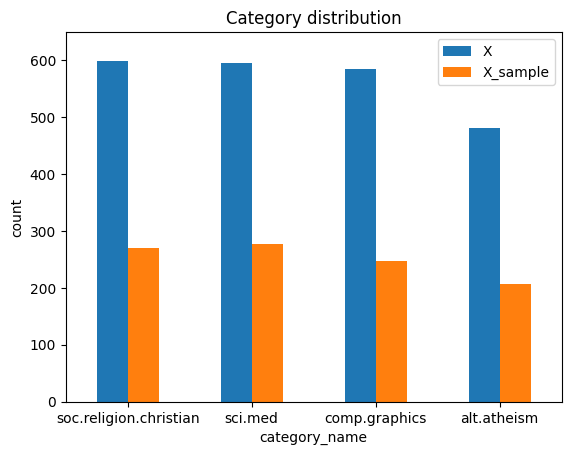

In [50]:
xsvc = X_sample["category_name"].value_counts().to_frame()
xvc = X["category_name"].value_counts().to_frame()

# make column name represents their DF name for visualization
xvc.rename(columns={"count": "X"}, inplace=True)
xvc["X_sample"] = xsvc["count"]

xvc.plot(kind="bar",
         ylim=(0, xvc["X"].max() + 50),
         ylabel="count",
         title="Category distribution",
         rot=0)

### Exercise 10

In [54]:
"""
Get the index of the second nonzero item of document 5 (id=4)
"""
# since X_counts is a sparse matrix, we can get it's list of non-zero item
# indices are not sorted yet, sort it since we need to get the second item
nnidx = X_counts[4].sorted_indices().nonzero()

# the second item, assume len(nnidx) > 1
nnidx = nnidx[1] 

# nonzero() returns two arrays: (row,...) and (col,...)
# since it's one-dimensional, we only care about the col index, thus:
nnidx = nnidx[1]

# find the term given the index
count_vect.get_feature_names_out()[nnidx]

'01'

### Exercise 11

[Text(0.5, 23.52222222222222, 'term'),
 Text(50.722222222222214, 0.5, 'document_id')]

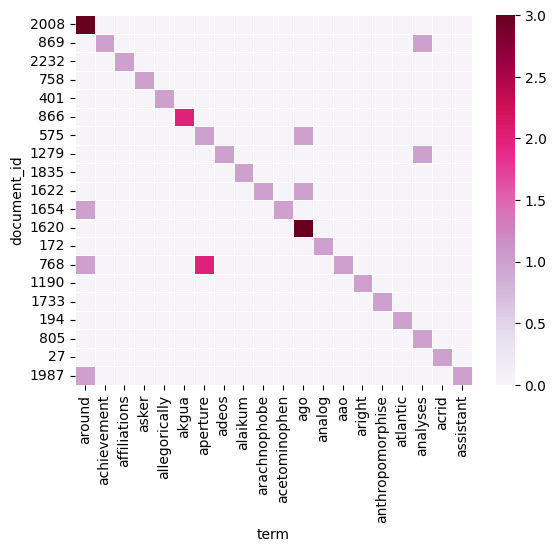

In [248]:
"""
Find top-k important terms and find representative document for those terms.
The importance is measured by computing its tf-idf score.
The representative document of each term has highest tf score.
Heatmap of k-term and k-document provides a top-k highlight of the corpus.
"""
### ===================================
# (1) analyze and heuristically remove meaningless term from text
stops = set(stopwords.words(("english")))
def stop(a):
    global stops
    r = []
    for t in a:
        is_not_stop = t not in stops
        has_no_number = not any([str(digit) in t for digit in (0,1,2,3,4,5,6,7,8,9)])
        if all([is_not_stop, has_no_number]):
            r.append(t)
    return r

cv2 = CountVectorizer()
Xa_counts = cv2.fit_transform(X.apply(lambda x: " ".join(stop(analyze(x["text"]))), axis=1))

### ===================================
# (2) compute the tf-idf score very efficiently using sparse operation
tf = (Xa_counts/Xa_counts.sum(axis=1)).tocsr()
# fast nnz: https://stackoverflow.com/questions/59338537/summarize-non-zero-values-in-a-scipy-matrix-by-axis
df = Xa_counts.astype(bool).astype(int).sum(axis=0)
idf = np.asarray(np.log2(Xa_counts.shape[0]/df))[0]
tf_idf = tf * idf
tf_idf_tuples = sorted(enumerate(tf_idf), key=lambda x:x[1], reverse=True)

### ===================================
# (3) find top-k docs to represent top-k terms
tk_k = 20
# index of top-k terms
tk_plot_x = [idx for idx, _ in tf_idf_tuples[:tk_k]]
# document with highest term-frequency of each top-k term
tk_plot_y = [tf[:, term_idx].argmax() for term_idx, _ in tf_idf_tuples[:tk_k]]
# the frequency of each term in each document
tk_plot_z = [[float(Xa_counts[doc_idx, term_idx]) for term_idx in tk_plot_x] for doc_idx in tk_plot_y]
# replace index with the actual term
tk_plot_x = [cv2.get_feature_names_out()[idx] for idx in tk_plot_x]

tk_ax = sns.heatmap(pd.DataFrame(tk_plot_z, columns=tk_plot_x, index=tk_plot_y),
                    cmap="PuRd",
                    linewidths=.5,
                    )
tk_ax.set(xlabel="term", ylabel="document_id")

We can observe that each term with high tf-idf is almost unique across document, which is the definition of tf-idf itself.

### Exercise 12

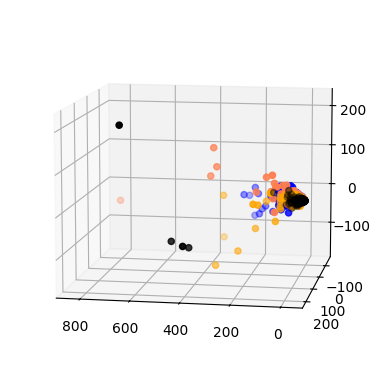

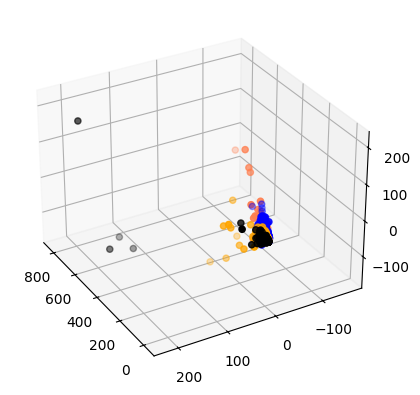

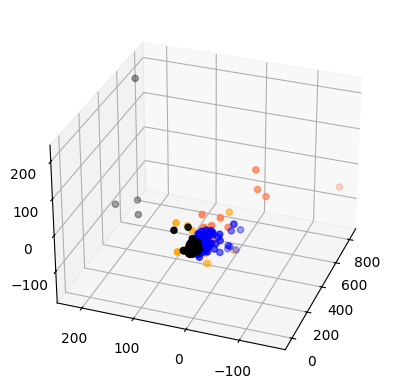

In [228]:
Xrr = PCA(n_components=3).fit_transform(X_counts.toarray())

def create_plot(elev, azim):
    global Xrr, col, categories
    ffig = plt.figure()
    axes = ffig.add_subplot(projection='3d')
    axes.view_init(elev=elev, azim=azim)
    for c, cat in zip(col, categories):
        xs = Xrr[X["category_name"] == cat].T[0]
        ys = Xrr[X["category_name"] == cat].T[1]
        zs = Xrr[X["category_name"] == cat].T[2]
        axes.scatter(xs, ys, zs, c = c, marker='o')
    return ffig

create_plot(10, 100).show()
create_plot(30, 150).show()
create_plot(30, 200).show()

### Exercise 13

In [247]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray())[0])

px.bar(x=count_vect.get_feature_names_out()[:300],
              y=term_frequencies[:300]).show()

### Exercise 14

In [246]:
# sum the frequencies of each term
tf_list = np.asarray(X_counts.sum(axis=0))[0]
# prepare format for exercise 15
tf_tuples = list(enumerate(tf_list))

px.bar(x=[count_vect.get_feature_names_out()[idx] for idx, _ in tf_tuples[:300]],
       y=[count for _, count in tf_tuples[:300]]).show()



### Exercise 15

In [241]:
# note: duplicate code from ex14 so each cell can be runned individually

# sum the frequencies of each term
tf_list = np.asarray(X_counts.sum(axis=0))[0]
# sort the frequencies
tf_tuples = sorted(enumerate(tf_list), key=lambda x:x[1], reverse=True)

px.bar(x=[count_vect.get_feature_names_out()[idx] for idx, _ in tf_tuples[:300]],
       y=[count for _, count in tf_tuples[:300]]).show()



### Exercise 16

In [240]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X["category"])
mlb.transform(X["category_name"]).tolist()

[[0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0,

Generating binarization of `category_name` using previously fitted `mlb` will not work,
as it has only learned the classes of `category`, and has not seen any class from `category_name`.